In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import drive
from google.colab import files
from datetime import datetime
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
file_path = "/content/train - Copy.csv"  # Thay đổi đường dẫn file nếu cần
df = pd.read_csv(file_path)
df.info()
df_test = pd.read_csv('/content/test.csv')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 12 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           750000 non-null  int64  
 1   Podcast_Name                 750000 non-null  object 
 2   Episode_Title                750000 non-null  object 
 3   Episode_Length_minutes       662907 non-null  float64
 4   Genre                        750000 non-null  object 
 5   Host_Popularity_percentage   750000 non-null  float64
 6   Publication_Day              750000 non-null  object 
 7   Publication_Time             750000 non-null  object 
 8   Guest_Popularity_percentage  603970 non-null  float64
 9   Number_of_Ads                749999 non-null  float64
 10  Episode_Sentiment            750000 non-null  object 
 11  Listening_Time_minutes       750000 non-null  float64
dtypes: float64(5), int64(1), object(6)
memory usage: 68.7+ MB


In [33]:

df_tuesday = df[df['Publication_Day'] == 'Tuesday']
df_tuesday.to_csv('Train_data.csv', index=False)

df_tuesday_test = df_test[df_test['Publication_Day'] == 'Tuesday']
df_tuesday_test.to_csv('Test_data.csv', index=False)
df_tuesday.info()

<class 'pandas.core.frame.DataFrame'>
Index: 98103 entries, 2 to 749993
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           98103 non-null  int64  
 1   Podcast_Name                 98103 non-null  object 
 2   Episode_Title                98103 non-null  object 
 3   Episode_Length_minutes       86247 non-null  float64
 4   Genre                        98103 non-null  object 
 5   Host_Popularity_percentage   98103 non-null  float64
 6   Publication_Day              98103 non-null  object 
 7   Publication_Time             98103 non-null  object 
 8   Guest_Popularity_percentage  78765 non-null  float64
 9   Number_of_Ads                98103 non-null  float64
 10  Episode_Sentiment            98103 non-null  object 
 11  Listening_Time_minutes       98103 non-null  float64
dtypes: float64(5), int64(1), object(6)
memory usage: 9.7+ MB


In [25]:

nan_counts = df_tuesday.isna().sum()
print("NaN counts per column:\n", nan_counts)

df_tuesday_filled = df_tuesday.fillna(method='ffill')

nan_counts_after_fill = df_tuesday_filled.isna().sum()
print("\nNaN counts after forward-fill:\n", nan_counts_after_fill)


NaN counts per column:
 id                                 0
Podcast_Name                       0
Episode_Title                      0
Episode_Length_minutes         11856
Genre                              0
Host_Popularity_percentage         0
Publication_Day                    0
Publication_Time                   0
Guest_Popularity_percentage    19338
Number_of_Ads                      0
Episode_Sentiment                  0
Listening_Time_minutes             0
dtype: int64

NaN counts after forward-fill:
 id                             0
Podcast_Name                   0
Episode_Title                  0
Episode_Length_minutes         0
Genre                          0
Host_Popularity_percentage     0
Publication_Day                0
Publication_Time               0
Guest_Popularity_percentage    0
Number_of_Ads                  0
Episode_Sentiment              0
Listening_Time_minutes         0
dtype: int64


<ipython-input-25-85cfdfc147bf>:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_tuesday_filled = df_tuesday.fillna(method='ffill')


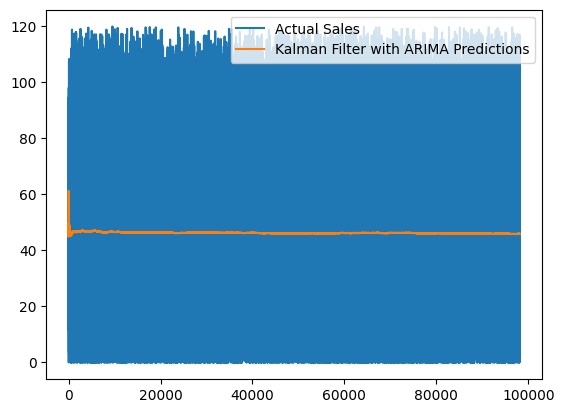

Forecasted values: [np.float64(45.939316086967985), np.float64(45.94249328442238), np.float64(45.94481214224814), np.float64(45.946504546227814), np.float64(45.94773973675939)]
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                98103
Model:                 ARIMA(1, 1, 1)   Log Likelihood             -463078.017
Date:                Tue, 06 May 2025   AIC                         926162.035
Time:                        10:34:23   BIC                         926190.516
Sample:                             0   HQIC                        926170.685
                              - 98103                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0010      0.003 

In [32]:


import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from filterpy.kalman import KalmanFilter

data = df_tuesday_filled['Listening_Time_minutes'].values

p = 1  # Autoregressive order
d = 1  # Integrated order
q = 1  # Moving average order

kf = KalmanFilter(dim_x=1, dim_z=1)
kf.x = np.array([[data[0]]]) # Initial state (first data point)
kf.F = np.array([[1]])  # State transition matrix (adjust if necessary)
kf.H = np.array([[1]]) # Measurement function
kf.P = np.array([[1]]) # Initial covariance matrix
kf.R = np.array([[0.1]]) # Measurement noise
kf.Q = np.array([[0.01]]) # Process noise

model = ARIMA(data, order=(p,d,q))
model_fit = model.fit()


predictions = []
for i in range(len(data)):
  if i == 0:
    predictions.append(data[0])
    continue
  arima_pred = model_fit.predict(start=i, end=i)[0]
  kf.predict()
  kf.update(np.array([[arima_pred]]))
  predictions.append(kf.x[0,0])


plt.plot(data, label='Actual Sales')
plt.plot(predictions, label='Kalman Filter with ARIMA Predictions')
plt.legend()
plt.show()

forecast_steps = 5
forecast = []
for i in range(forecast_steps):
  kf.predict()
  arima_forecast = model_fit.forecast(steps=1)[0]
  kf.update(np.array([[arima_forecast]]))
  forecast.append(kf.x[0,0])

print("Forecasted values:", forecast)
print(model_fit.summary())

<ipython-input-44-bae22b22d8b5>:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv('Train_data.csv', index_col='id', parse_dates=True)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/structural.py:426: SpecificationWarning: Value of `trend` may be overridden when the trend component is specified using a model string.
  warn("Value of `%s` may be overridden when the trend"
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an 

                            Unobserved Components Results                            
Dep. Variable:        Listening_Time_minutes   No. Observations:                98103
Model:                           local level   Log Likelihood             -463073.064
                   + stochastic seasonal(12)   AIC                         926152.128
Date:                       Tue, 06 May 2025   BIC                         926180.609
Time:                               10:59:43   HQIC                        926160.779
Sample:                                    0                                         
                                     - 98103                                         
Covariance Type:                         opg                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
sigma2.irregular   737.0779      4.269    172.670      0

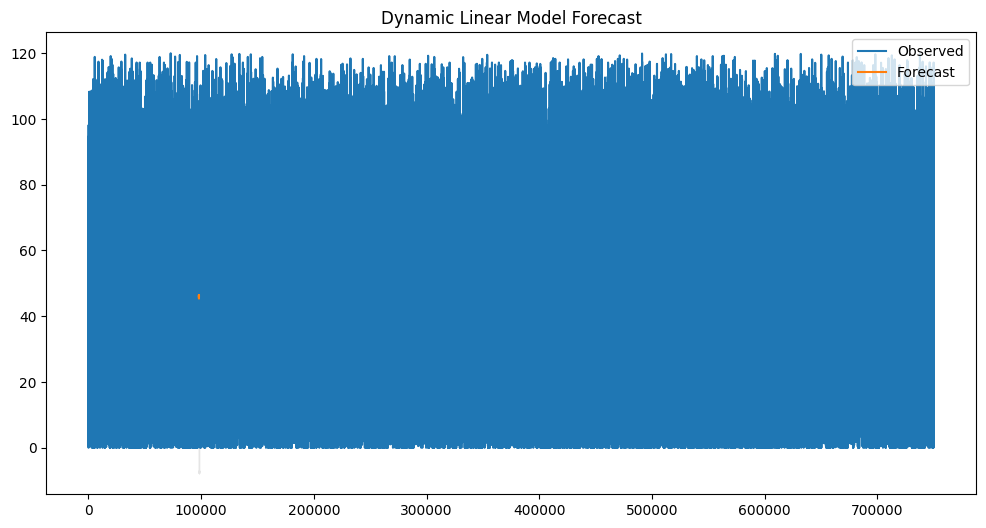

In [44]:


import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import drive
from google.colab import files
from datetime import datetime
import seaborn as sns
from statsmodels.tsa.statespace.structural import UnobservedComponents

data = pd.read_csv('Train_data.csv', index_col='id', parse_dates=True)
y = data['Listening_Time_minutes']

model = UnobservedComponents(y, level='llevel', trend='ltrend', seasonal=12) # Assuming seasonality of 12 periods (monthly)
model_fit = model.fit()

# Make forecasts
forecast_horizon = 12
forecast = model_fit.get_forecast(steps=forecast_horizon)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Print model summary
print(model_fit.summary())

# Plot the forecast
plt.figure(figsize=(12,6))
plt.plot(y, label='Observed')
plt.plot(forecast_mean, label='Forecast')
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:,0], forecast_ci.iloc[:,1], color='k', alpha=0.1)
plt.legend()
plt.title('Dynamic Linear Model Forecast')
plt.show()


<ipython-input-41-a57161cd8025>:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv('/content/Train_data.csv', index_col='id', parse_dates=True)  # Assuming 'id' is the date column
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/structural.py:426: SpecificationWarning: Value of `trend` may be overridden when the trend component is specified using a model string.
  warn("Value of `%s` may be overridden when the trend"
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


                          Unobserved Components Results                           
Dep. Variable:     Listening_Time_minutes   No. Observations:                98103
Model:                        local level   Log Likelihood             -463078.051
Date:                    Tue, 06 May 2025   AIC                         926160.101
Time:                            10:55:09   BIC                         926179.089
Sample:                                 0   HQIC                        926165.869
                                  - 98103                                         
Covariance Type:                      opg                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
sigma2.irregular   737.1063      4.272    172.533      0.000     728.733     745.480
sigma2.level      1.212e-06   2.79e-06      0.435      0.664   -4.25e-06    6.68e

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


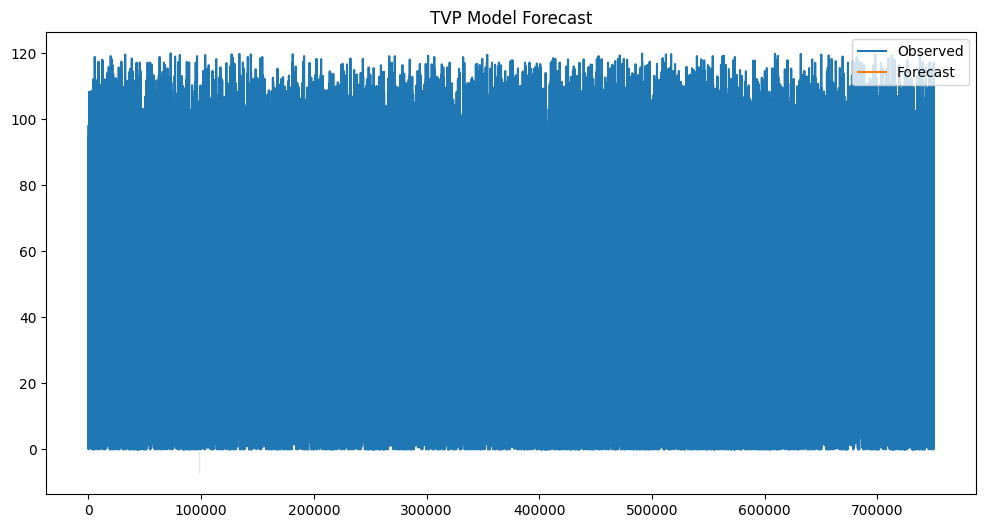

In [41]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.structural import UnobservedComponents

data = pd.read_csv('/content/Train_data.csv', index_col='id', parse_dates=True)  # Assuming 'id' is the date column
y = data['Listening_Time_minutes']


model = UnobservedComponents(y,
                             level='llevel',  # Local level component
                             trend='ltrend',   # Local trend component
                             seasonal=None) # You can add seasonal if applicable
model_fit = model.fit()

print(model_fit.summary())


forecast_horizon = 5
forecast = model_fit.get_forecast(steps=forecast_horizon)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

plt.figure(figsize=(12, 6))
plt.plot(y, label='Observed')
plt.plot(forecast_mean, label='Forecast')
plt.fill_between(forecast_ci.index,
                 forecast_ci.iloc[:, 0],
                 forecast_ci.iloc[:, 1],
                 color='k', alpha=.1)
plt.legend()
plt.title('TVP Model Forecast')
plt.show()
